# 3.7.1 梯度消失

In [1]:
import warnings
warnings.simplefilter("ignore")

导入功能模块

In [2]:
import sys

load_dataset_module_path = '../../'
sys.path.append(load_dataset_module_path)

from load_hyperspectral_dataset import (load_hyperspectral_data, y_labels,
                                        extract_features,
                                        plot_selected_categories,
                                        plot_decision_function)

In [3]:
#%matplotlib inline
#%matplotlib notebook 

#%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.utils import shuffle
import seaborn as sns
from ipywidgets import interact_manual


mpl.style.use('ggplot')

加载数据集

In [4]:
img_file_path = '../../Hyperspectral_Project/dc.tif'
label_file_path = '../../Hyperspectral_Project/dctest.project'

raw_X, raw_y, pixel_position = load_hyperspectral_data(img_file_path,
                                                       label_file_path)

hyperspectral_df =  extract_features(raw_X, raw_y)

画出指定类别，训练模型分类

In [5]:
import torch


x = torch.rand(5, 3)
print(x)

In [30]:
x = torch.ones((100, 2)).uniform_(-1, 1)
y = 0.5*torch.ones((100,1)) 
print(x)

tensor([[ 0.8818, -0.8668],
        [-0.1363, -0.2439],
        [ 0.8219, -0.2049],
        [ 0.4047, -0.0252],
        [-0.7581, -0.2658],
        [-0.7607, -0.4452],
        [-0.8348,  0.8814],
        [-0.9340, -0.7795],
        [ 0.3956,  0.6170],
        [ 0.1705,  0.7711],
        [-0.1255, -0.2936],
        [-0.9499,  0.2035],
        [-0.1676,  0.8705],
        [-0.1025,  0.0206],
        [ 0.3198,  0.5712],
        [ 0.0584,  0.3835],
        [-0.2871, -0.6258],
        [ 0.9953, -0.6273],
        [-0.0421,  0.6482],
        [-0.8480, -0.4230],
        [-0.3497, -0.7190],
        [ 0.8050,  0.2406],
        [-0.6468, -0.6207],
        [-0.8344, -0.0309],
        [-0.9921, -0.1161],
        [-0.0555, -0.8394],
        [ 0.8810, -0.9356],
        [ 0.0206,  0.2708],
        [ 0.2776, -0.5339],
        [ 0.0023, -0.2588],
        [-0.0672,  0.2231],
        [ 0.5111,  0.9055],
        [ 0.5452, -0.1510],
        [ 0.4759,  0.6258],
        [ 0.0124, -0.6646],
        [ 0.8518,  0

In [31]:
print(y)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0

In [32]:
import collections

In [33]:
model_layers = collections.OrderedDict()

n_layers =100


for i in range(n_layers):
    if i==0:
        model_layers[f'linear_{i+1}']=torch.nn.Linear(2, 10)
        model_layers[f'sigmoid_{i+1}']=torch.nn.Sigmoid()
    else:    
        model_layers[f'linear_{i+1}']=torch.nn.Linear(10, 10)
        model_layers[f'sigmoid_{i+1}']=torch.nn.Sigmoid()
          

# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    model_layers
)

loss_fn = torch.nn.MSELoss(reduction='mean')

In [37]:
y_pred = model(x)
loss = loss_fn(y_pred, y)

In [38]:
loss.backward()

for i in range(n_layers):
    print(f'{i+1}-th layer:',model[i*2].weight.grad)


1-th layer: tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])
2-th layer: tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])
3-th layer: tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.,

In [39]:
import numpy as np

Text(0, 0.5, 'Gradient value')

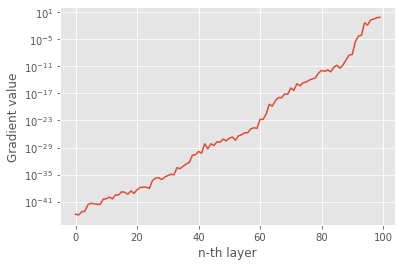

In [45]:
# Create Tensors to hold input and outputs.
x = torch.tensor([1.0])
y = torch.tensor([1.0])

model_layers = collections.OrderedDict()

n_layers = 100

for i in range(n_layers):
    model_layers[f'linear_{i+1}']=torch.nn.Linear(1, 1)
          

# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    model_layers
)

loss_fn = torch.nn.MSELoss(reduction='sum')
y_pred = model(x)
loss = loss_fn(y_pred, y)

loss.backward()

weights_list=[]

for i in range(n_layers):
    weights_list.append(np.abs(model[i].weight.grad[0][0].numpy()))

plt.plot(range(n_layers),weights_list)
ax = plt.gca()
ax.set_yscale('log')

plt.xlabel('n-th layer')
plt.ylabel('Gradient value')

In [69]:
def vanishing_gradient(n_layers):
    # Create Tensors to hold input and outputs.
    x = torch.tensor([1.0])
    y = torch.tensor([1.0])

    model_layers = collections.OrderedDict()

    #n_layers = 10

    for i in range(n_layers):
        model_layers[f'linear_{i+1}']=torch.nn.Linear(1, 1)


    # Use the nn package to define our model and loss function.
    model = torch.nn.Sequential(
        model_layers
    )

    loss_fn = torch.nn.MSELoss(reduction='sum')
    y_pred = model(x)
    loss = loss_fn(y_pred, y)

    loss.backward()

    weights_list=[]

    for i in range(n_layers):
        
        np.abs(model[i].weight.grad.numpy())
        weights_list.append()

    plt.bar(range(n_layers),weights_list,label='Absolute value of gradients')
    ax = plt.gca()
    ax.set_yscale('log')

    ax.set_title(f'{n_layers} layers with 1 nodes in each layer')

    plt.xlabel('n-th layer')
    plt.ylabel('Gradient value')
    plt.legend()
    
    plt.savefig(f'{n_layers}_layers_with_1_nodes.pdf',
            bbox_inches='tight')

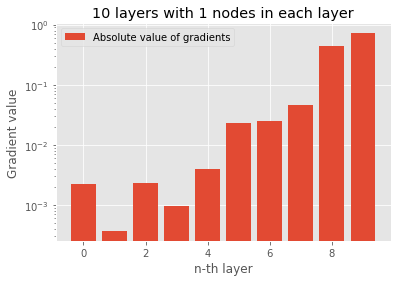

In [70]:
vanishing_gradient(10)

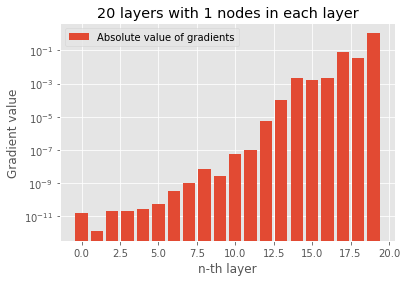

In [71]:
vanishing_gradient(20)

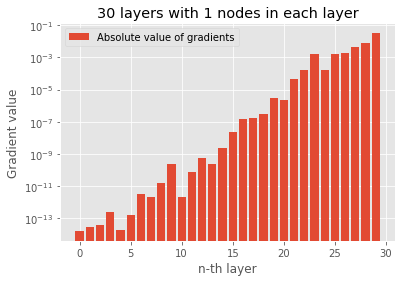

In [72]:
vanishing_gradient(30)

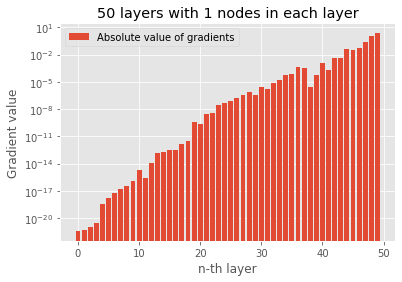

In [73]:
vanishing_gradient(50)

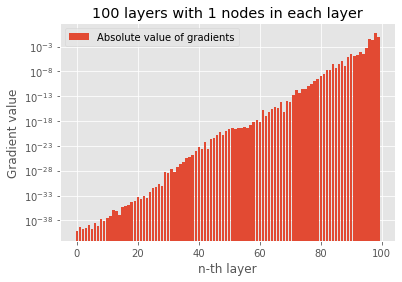

In [74]:
vanishing_gradient(100)

In [43]:
raw_X

array([[5748, 5605, 5734, ...,   55,   46,   27],
       [6599, 6541, 6568, ...,   54,   42,   26],
       [6560, 6594, 6673, ...,   51,   40,   26],
       ...,
       [3675, 3559, 3542, ...,   10,    9,    6],
       [3840, 3648, 3610, ...,    8,    6,    4],
       [3675, 3604, 3584, ...,    9,    6,    5]], dtype=int16)

In [46]:
len(raw_y)

8079

In [181]:
from torch.utils.data import TensorDataset,DataLoader

In [205]:
inps = torch.tensor(hyperspectral_df[['NDVI', 'MNDWI', 'NDBI']].to_numpy(),
                    dtype=torch.float32)
tgts = torch.tensor(raw_y)
                    #, dtype=torch.float32)
#.view(8079, 1)

dataset = TensorDataset(inps, tgts)
loader = DataLoader(dataset,batch_size=8079)

In [206]:
tgts

tensor([0, 0, 0,  ..., 6, 6, 6])

In [207]:
from torch import nn

In [208]:
def vanishing_gradient_sigmoid(n_layers, n_epoch=100):

    model_layers = collections.OrderedDict()

    for i in range(n_layers):
        if i == 0:
            model_layers[f'linear_{i+1}'] = torch.nn.Linear(3, 30)
            model_layers[f'sigmoid_{i+1}'] = torch.nn.Sigmoid()
        else:
            model_layers[f'linear_{i+1}'] = torch.nn.Linear(30, 30)
            model_layers[f'sigmoid_{i+1}'] = torch.nn.Sigmoid()

    model_layers[f'output_layer'] = torch.nn.Linear(30, 7)

    model = torch.nn.Sequential(model_layers)

    loss_fn = nn.CrossEntropyLoss()

    learning_rate = 0.1
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    grad_list = []
    #n_epoch = 50
    for e in range(n_epoch):
        for X, y in loader:
            # Compute prediction and loss
            y_pred = model(X)
            loss = loss_fn(y_pred, y)

            # Backpropagation
            optimizer.zero_grad()
            loss.backward()
            grad_list.append([
                np.linalg.norm(model[2 * i].weight.grad.numpy(), ord=2)
                for i in range(n_layers)
            ])
            optimizer.step()

    grad = np.array(grad_list)

    #     plt.bar(range(n_layers),weights_list,label='Absolute value of gradients')
    ax = plt.gca()
    ax.set_yscale('log')

    ax.set_title(f'Sigmoid with 30 neurons/layer')
    
    for i in range(grad.shape[1]):

        plt.plot(range(1, n_epoch + 1),
                 grad[:, i],
                 label=f'Hidden layer {i+1}')

    plt.xlabel('Epoch')
    plt.ylabel('$\Vert \delta \Vert$')
    plt.legend(loc='upper left',
           #fontsize=3,
           frameon=False,
           bbox_to_anchor=(1, 1)) 


    plt.savefig(f'Sigmoid-with-30-neurons-each-layer.pdf',
            bbox_inches='tight')

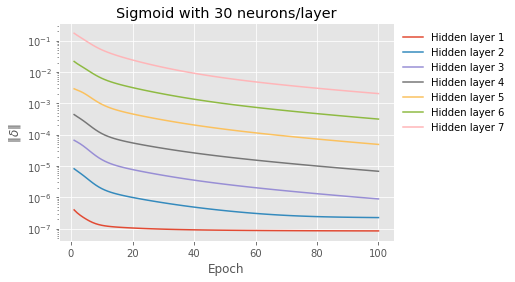

In [209]:
vanishing_gradient_sigmoid(n_layers=7,n_epoch=100) 

In [210]:
def vanishing_gradient_relu(n_layers,loader, n_epoch=100):

    model_layers = collections.OrderedDict()

    for i in range(n_layers):
        if i == 0:
            model_layers[f'linear_{i+1}'] = torch.nn.Linear(3, 30)
            model_layers[f'relu_{i+1}'] = torch.nn.ReLU()
        else:
            model_layers[f'linear_{i+1}'] = torch.nn.Linear(30, 30)
            model_layers[f'relu_{i+1}'] = torch.nn.ReLU()

    model_layers[f'output_layer'] = torch.nn.Linear(30, 7)

    model = torch.nn.Sequential(model_layers)

    loss_fn = nn.CrossEntropyLoss()

    learning_rate = 0.1
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    grad_list = []
    #n_epoch = 50
    for e in range(n_epoch):
        for X, y in loader:
            # Compute prediction and loss
            y_pred = model(X)
            loss = loss_fn(y_pred, y)

            # Backpropagation
            optimizer.zero_grad()
            loss.backward()
            
            optimizer.step()
            
        grad_list.append([
                np.linalg.norm(model[2 * i].weight.grad.numpy(), ord=2)
                for i in range(n_layers)
            ])

    grad = np.array(grad_list)

    #     plt.bar(range(n_layers),weights_list,label='Absolute value of gradients')
    ax = plt.gca()
    ax.set_yscale('log')

    ax.set_title(f'ReLU with 30 neurons/layer')
    
    for i in range(grad.shape[1]):

        plt.plot(range(1, n_epoch + 1),
                 grad[:, i],
                 label=f'Hidden layer {i+1}')

    plt.xlabel('Epoch')
    plt.ylabel('$\Vert \delta \Vert$')
    plt.legend(loc='upper left',
           #fontsize=3,
           frameon=False,
           bbox_to_anchor=(1, 1)) 


    plt.savefig(f'ReLU-with-30-neurons-each-layer.pdf',
            bbox_inches='tight')

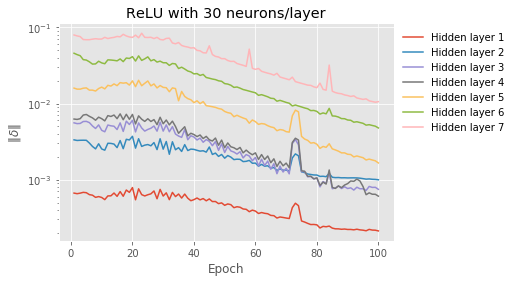

In [211]:
vanishing_gradient_relu(n_layers=7,n_epoch=100,loader=loader) 

In [212]:
def vanishing_gradient_relu_bn(n_layers,loader, n_epoch=100):

    model_layers = collections.OrderedDict()

    for i in range(n_layers):
        if i == 0:
            model_layers[f'linear_{i+1}'] = torch.nn.Linear(3, 30)
        else:
            model_layers[f'linear_{i+1}'] = torch.nn.Linear(30, 30)
        
        
        model_layers[f'relu_{i+1}'] = torch.nn.ReLU()
        model_layers[f'bn_{i+1}'] = torch.nn.BatchNorm1d(30)


    model_layers[f'output_layer'] = torch.nn.Linear(30, 7)

    model = torch.nn.Sequential(model_layers)

    loss_fn = nn.CrossEntropyLoss()

    learning_rate = 0.1
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    grad_list = []
    #n_epoch = 50
    for e in range(n_epoch):
        for X, y in loader:
            # Compute prediction and loss
            y_pred = model(X)
            loss = loss_fn(y_pred, y)

            # Backpropagation
            optimizer.zero_grad()
            loss.backward()
            grad_list.append([
                np.linalg.norm(model[3 * i].weight.grad.numpy(), ord=2)
                for i in range(n_layers)
            ])
            optimizer.step()

    grad = np.array(grad_list)

    #     plt.bar(range(n_layers),weights_list,label='Absolute value of gradients')
    ax = plt.gca()
    ax.set_yscale('log')

    ax.set_title(f'ReLU+BN with 30 neurons/layer')
    
    for i in range(grad.shape[1]):

        plt.plot(range(1, n_epoch + 1),
                 grad[:, i],
                 label=f'Hidden layer {i+1}')

    plt.xlabel('Epoch')
    plt.ylabel('$\Vert \delta \Vert$')
    plt.legend(loc='upper left',
           #fontsize=3,
           frameon=False,
           bbox_to_anchor=(1, 1)) 


    plt.savefig(f'ReLU-BN-with-30-neurons-each-layer.pdf',
            bbox_inches='tight')

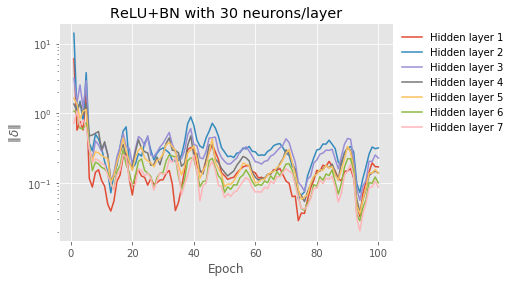

In [213]:
vanishing_gradient_relu_bn(n_layers=7,n_epoch=100,loader=loader)

In [214]:
def vanishing_gradient_Sigmoid_bn(n_layers,loader, n_epoch=100):

    model_layers = collections.OrderedDict()

    for i in range(n_layers):
        if i == 0:
            model_layers[f'linear_{i+1}'] = torch.nn.Linear(3, 30)
        else:
            model_layers[f'linear_{i+1}'] = torch.nn.Linear(30, 30)
        
        model_layers[f'bn_{i+1}'] = torch.nn.BatchNorm1d(30)
        model_layers[f'Sigmoid_{i+1}'] = torch.nn.Sigmoid()



    model_layers[f'output_layer'] = torch.nn.Linear(30, 7)

    model = torch.nn.Sequential(model_layers)

    loss_fn = nn.CrossEntropyLoss()

    learning_rate = 0.1
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    grad_list = []
    #n_epoch = 50
    for e in range(n_epoch):
        for X, y in loader:
            # Compute prediction and loss
            y_pred = model(X)
            loss = loss_fn(y_pred, y)

            # Backpropagation
            optimizer.zero_grad()
            loss.backward()
            grad_list.append([
                np.linalg.norm(model[3 * i].weight.grad.numpy(), ord=2)
                for i in range(n_layers)
            ])
            optimizer.step()

    grad = np.array(grad_list)

    #     plt.bar(range(n_layers),weights_list,label='Absolute value of gradients')
    ax = plt.gca()
    ax.set_yscale('log')

    ax.set_title(f'Sigmoid+BN with 30 neurons/layer')
    
    for i in range(grad.shape[1]):

        plt.plot(range(1, n_epoch + 1),
                 grad[:, i],
                 label=f'Hidden layer {i+1}')

    plt.xlabel('Epoch')
    plt.ylabel('$\Vert \delta \Vert$')
    plt.legend(loc='upper left',
           #fontsize=3,
           frameon=False,
           bbox_to_anchor=(1, 1)) 


    plt.savefig(f'Sigmoid-BN-with-30-neurons-each-layer.pdf',
            bbox_inches='tight')

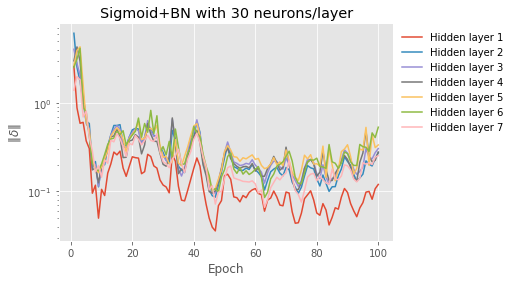

In [215]:
vanishing_gradient_Sigmoid_bn(n_layers=7,n_epoch=100,loader=loader)